This code is written to model a flow energy harvester. It uses 2D thin plate model to simulate the dynamics of the flaping-foil system.
See the paper entitled "Modeling the capacity of a novel flow-energy harvester" published in Applied Mathematics Modeling 33 (2009) p.2207-2217

Populating the interactive namespace from numpy and matplotlib


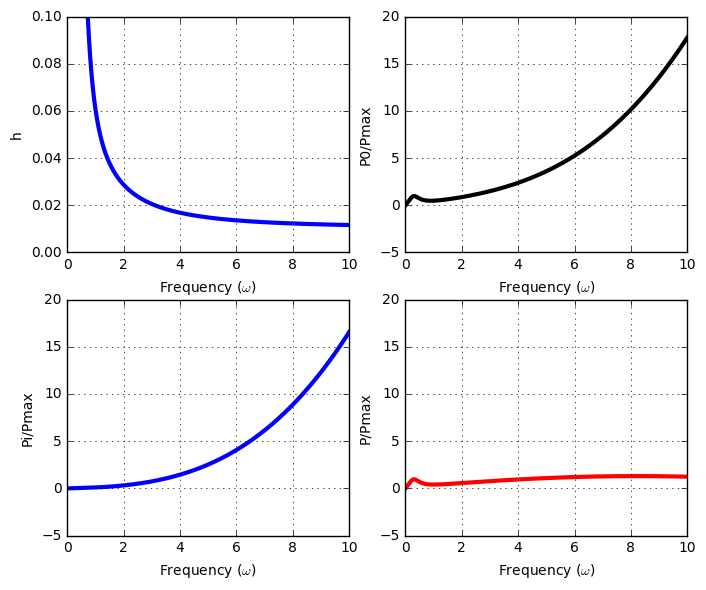

In [165]:
%pylab inline
import numpy as np
#import warnings
#warnings.simplefilter('ignore',DeprecationWarning);

# geometry parameters and material properties
a = 1.0 # length of the foil
b = 0.25 # Distance between the pitching axis and the center of the foil
rho = 1.0 # Density
s = 10.0 # The foil span
k = 1e-4 # Stiffness
theta0 = 10.0*(np.pi/180.0) # Radians

# Fluid flow velocity
U = 1.0 # m/s

# Frequency range
FreqMax = 10 # rad/s
divd = FreqMax*100
omg = np.linspace(0.0,FreqMax,divd)

# Damping value
c = np.pi*rho*a**2*s*omg 

# Deficiency factor (Estimated using polynomials)
a0 = 0.0451; a1 = 0.5249; a2 = 1.0761; a3 = 0.5; b0 = 0.0455; b1 = 0.0699; b2 = 1.9022
sig_comp = np.array(omg*1j)*a/U
C_coef = np.divide(sig_comp**3*a3+sig_comp**2*a2+sig_comp*
                   a1+a0,sig_comp**3+sig_comp**2*b2+sig_comp*b1+b0)

# Find z0
numerator = np.pi*rho*a*U*s*np.multiply(U+np.array(omg*1j)*(a/4.0-b),C_coef)+np.pi*rho*a**2.0*s*np.divide(np.array(omg*1j)*U+b*omg**2,4.0)

denominator = np.array(omg*1j)*c+k-np.pi*rho*a*(-np.array(omg*1j)*U*C_coef+a*omg**2/4.0)*s

z0 = np.divide(numerator,denominator)*theta0

pylab.figure(figsize=(8,14))
pylab.subplot(421)
pylab.plot(omg,np.abs(z0),LineWidth=3.0,label='Heaving response');pylab.grid()
pylab.ylim(0,0.1)
pylab.ylabel('h');pylab.xlabel('Frequency ($\omega$)')

# Maximum power
Pmax = np.pi/8.0*rho*a*s*U**3*theta0**2


# Average Power due to heave amplitude
P0 = np.divide(c*omg**2.0*np.abs(z0)**2.0,2.0)

pylab.subplot(422)
pylab.plot(omg,P0/Pmax,'k',LineWidth = 3.0,label='Average power due to heave amplitude');pylab.grid()
pylab.xlabel('Frequency ($\omega$)')
pylab.ylabel('P0/Pmax')
pylab.ylim(-5,20);

# Hydrodynamic moment on the foil w.r.t the pitching axis
M0 = (-np.pi*rho*a**2.0*s/4.0)*(-b*omg**2.0*z0+(a/4.0-b)*U*
                              np.array(omg*1j)*theta0-a**2.0/4.0*(1.0/8.0+4.0*b**2.0/a**2.0)*
                              omg**2*theta0-U*C_coef*(4.0*b/a-1.0)*(-np.array(omg*1j)*z0+U*
                                                                  theta0+(a/4.0-b)*np.array(omg*1j)*theta0))

# Average power spent to rotate the foil by activating the pitching motion
Pi = -omg*theta0*M0.imag/2.0

pylab.subplot(423)
pylab.plot(omg,Pi/Pmax,LineWidth = 3.0,label='Average power to rotate the foil');pylab.grid()
pylab.xlabel('Frequency ($\omega$)')
pylab.ylabel('Pi/Pmax')
pylab.ylim(-5,20);

# Power calculation
Power = P0 - Pi

pylab.subplot(424)
pylab.plot(omg,Power/Pmax,'r',LineWidth=3.0,label='Net power generation'),pylab.grid()
pylab.xlabel('Frequency ($\omega$)');
pylab.ylabel('P/Pmax')
pylab.ylim(-5,20);

# Efficiency calculation
#eta = np.divide(Power,rho*U**3.0*s*np.abs(z0))
#pylab.figure(figsize=(6,2))
#pylab.plot(omg,eta*100.0,'g',LineWidth=3.0,label='Efficiency'),pylab.grid()
#pylab.xlabel('Frequency ($\omega$)');pylab.ylabel('%')
#pylab.legend(loc='best')
